In [7]:
from scipy import io
import numpy as np
im = io.loadmat('/home/yiping/Downloads/wire/data/bun.mat')
im.keys()

print((im['occupancy_grid']/255).sum())
print(512**3)


701236.0
134217728


: 

In [21]:
def jl(n,eps):
    return (4*np.log(n))/(eps**2/2-eps**3/3)

jl(196,0.3)
# np.log(196*1024*4)

586.4571843589464

In [4]:
import open3d as o3d
import numpy as np

mesh = o3d.io.read_triangle_mesh("/home/yiping/Downloads/wire/bun_zipper.ply")
mesh.compute_vertex_normals()
pcd = mesh.sample_points_poisson_disk(number_of_points=1000000)
points = np.asarray(pcd.points)

occupancy_grid = np.zeros((512,512,512), dtype=np.uint8)

min_bound = points.min(axis=0) 
max_bound = points.max(axis=0)  

for point in points:
    normalized = (point - min_bound) / (max_bound - min_bound)
    voxel_coords = (normalized * (512 - 1)).astype(int)
    occupancy_grid[voxel_coords[0], voxel_coords[1], voxel_coords[2]] = 1

In [3]:
import numpy as np

# 假设points是你的点云数据，每个元素是(x, y, z)坐标
# 对于一个真实的例子，这里的points将是上一步从模型中采样得到的点云坐标

# 创建一个512x512x512的数组，用0初始化，表示没有点占据
occupancy_grid = np.zeros((512, 512, 512), dtype=np.uint8)

# 计算点云的边界
min_bound = points.min(axis=0)  # 找到x, y, z的最小值
max_bound = points.max(axis=0)  # 找到x, y, z的最大值

# 将每个点映射到体素网格中
for point in points:
    # 标准化点坐标到[0, 1]
    normalized = (point - min_bound) / (max_bound - min_bound)
    # 将归一化坐标映射到网格大小
    voxel_coords = (normalized * (512 - 1)).astype(int)
    occupancy_grid[voxel_coords[0], voxel_coords[1], voxel_coords[2]] = 1

In [1]:
occupancy_grid.max()

NameError: name 'occupancy_grid' is not defined

In [22]:
from scipy.io import savemat

data = {'occupancy_grid': occupancy_grid*255}

savemat("grid.mat", data)



: 

In [10]:
import numpy as np
import pyvista as pv

# 假设occupancy_grid是你已经有的512x512x512的numpy数组

# 将numpy数组转换为PyVista的网格格式
grid = pv.UniformGrid()

# 设置网格的尺寸
grid.dimensions = np.array(occupancy_grid.shape) + 1

# 设置网格的原点（这里设置为(0,0,0)）
grid.origin = (0, 0, 0)

# 设置网格的间距（这里每个体素的大小设置为1x1x1）
grid.spacing = (1, 1, 1)

# 添加网格的标量数据
grid.cell_arrays["values"] = occupancy_grid.flatten(order="F")  # Flatten the array

# 提取等值面
contours = grid.contour(isosurfaces=[1], scalars="values")

# 可视化
p = pv.Plotter()
p.add_mesh(contours, color="white", opacity=0.5)
p.show()

AttributeError: module 'pyvista' has no attribute 'UniformGrid'

In [3]:
import pyvista as pv
import numpy as np

# 将occupancy grid转换为一个UnstructuredGrid，以便可视化
# 首先，获取所有占据的体素的中心点坐标
occupied_indices = np.array(np.where(occupancy_grid)).T
occupied_points = occupied_indices + 0.5  # 把索引转换为中心点坐标

# 创建pyvista的点云
cloud = pv.PolyData(occupied_points)
# 创建体素：每个点为一个立方体的中心
voxels = cloud.delaunay_3d(alpha=1)

# 可视化
p = pv.Plotter()
p.add_mesh(voxels, opacity=0.5, color='blue')
p.show_grid()
p.show()

2024-03-31 10:35:30.933 (   8.522s) [    7B3D5C572740]      vtkDelaunay3D.cxx:513   WARN| vtkDelaunay3D (0x64a4416a7340): 1 degenerate triangles encountered, mesh quality suspect


: 

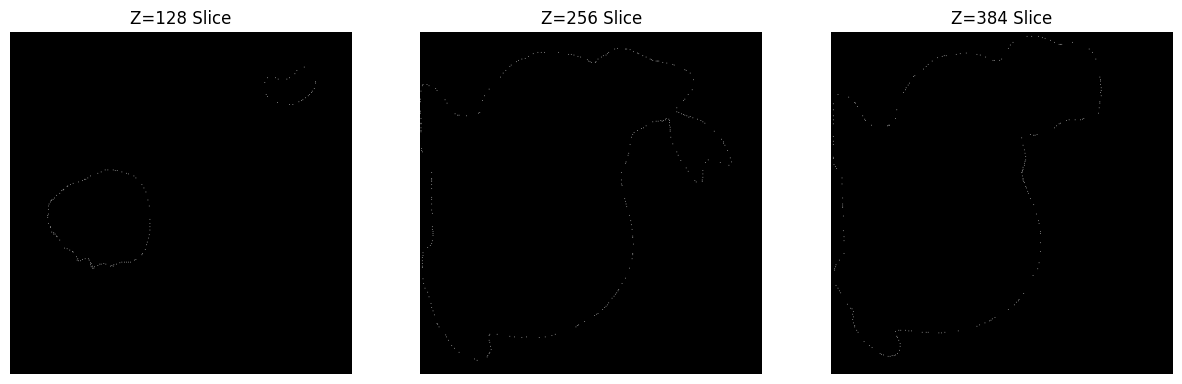

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 假设occupancy_grid是你的512x512x512 binary occupancy grid

# 选择要可视化的切片索引
z_slices = [128, 256, 384]  # Z轴上的三个不同位置

# 创建一个画布，绘制三个切片
fig, axes = plt.subplots(1, len(z_slices), figsize=(15, 5))
for i, z in enumerate(z_slices):
    # 提取特定Z轴位置的切片
    slice = occupancy_grid[:, :, z]
    # 在子图上绘制切片
    axes[i].imshow(slice, cmap='gray')
    axes[i].set_title(f'Z={z} Slice')
    axes[i].axis('off')

# 显示图形
plt.show()

In [12]:
from plyfile import PlyData, PlyElement
pc = PlyData.read('/home/yiping/Downloads/wire/bun_zipper.ply')

In [13]:
pc

PlyData((PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('confidence', 'float'), PlyProperty('intensity', 'float')), count=35947, comments=[]), PlyElement('face', (PlyListProperty('vertex_indices', 'uchar', 'int'),), count=69451, comments=[])), text=True, byte_order='=', comments=['zipper output'], obj_info=[])